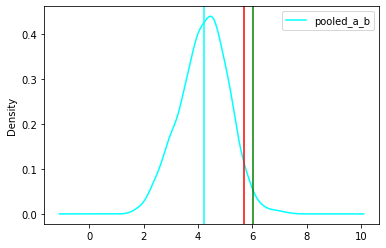

In [30]:
from resamples import par_mc_samples
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

df = pd.DataFrame([[1,2],[3,2],[5,6],[7,7],[9,0]])
df.columns = ['a','b']

original_sample_means = df.mean()


pooled_sample = pd.DataFrame({'pooled_a_b':pd.concat([df['a'],df['b']],axis=0)})


resampled_pooled_df = par_mc_samples(pooled_sample,10,1000,replace = True)
resampled_means_for_each_rep = resampled_pooled_df.mean().compute()
sample_distribution_mean = resampled_pooled_df.mean().mean().compute()

std_error = resampled_pooled_df.mean().std().compute()

resampled_pooled_df.mean().compute().plot.density(color = 'aqua')

#plt.axvline(original_sample_means['a'],color = 'fuchsia')
#plt.axvline(original_sample_means['b'],color = 'mediumvioletred')
# Sample distribution mean
plt.axvline(sample_distribution_mean[0],color = 'aqua') 
# Difference of the means of sample a and sample b divided by the standard error (scaled to the sampling distribution mean)
scaled_std_errors_difference_a_b = sample_distribution_mean[0] + (original_sample_means['a'] - original_sample_means['b'])/std_error[0]
plt.axvline(scaled_std_errors_difference_a_b,color = 'green')


plt.axvline(sample_distribution_mean[0] + 1.65 * std_error[0],color='r')
#plt.axvline(sample_distribution_mean[0] - std_error[0],color='y')
#plt.axvline(sample_distribution_mean[0] + 2 * std_error[0],color='r')
#plt.axvline(sample_distribution_mean[0] - 2 * std_error[0],color='r')



plt.show()

In [31]:
print("We simulated the null distribution for the pooled populations reporesented by samples a and b")
print("H0: The population mean of sample a <= the population mean of sample b")
print("H1: The population mean of sample a > the population mean of sample b")
print("There is sufficient evidence to reject the null hypothesis that a <= b and conclude that")
print("the mean of sample a > the mean of sample b.")
print(f"p = {1 - st.norm.cdf((original_sample_means['a'] - original_sample_means['b'])/std_error[0])}")

We simulated the null distribution for the pooled populations reporesented by samples a and b
H0: The population mean of sample a <= the population mean of sample b
H1: The population mean of sample a > the population mean of sample b
There is sufficient evidence to reject the null hypothesis that a <= b and conclude that
the mean of sample a > the mean of sample b.
p = 0.03689467730438756
